# Driver Alertness Detection

## Introduction

Driving while distracted, fatigued or drowsy may lead to accidents. Activities that divert the driver's attention from the road ahead, such as engaging in a conversation with other passengers in the car, making or receiving phone calls, sending or receiving text messages, eating while driving or events outside the car may cause driver distraction. Fatigue and drowsiness can result from driving long hours or from lack of sleep.

The objective of this challenge is to design a detector/classifier that will detect whether the driver is alert or not alert, employing any combination of vehicular, environmental and driver physiological data that are acquired while driving.

## Downloading and Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install opendatasets --quiet
!pip install plotly --quiet
import plotly.express as px
import os

## Downloading and importing the Data

### Downloadig Data

In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/c/stayalert/overview")

Skipping, found downloaded files in "./stayalert" (use force=True to force download)


In [5]:
os.listdir("./stayalert")

['fordTrain.csv', 'Solution.csv', 'fordTest.csv', 'example_submission.csv']

In [6]:
train_df=pd.read_csv("./stayalert/fordTrain.csv")
train_df.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [7]:
test_df=pd.read_csv("./stayalert/fordTest.csv")
test_df.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.57,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


### Data Description 

The data for this challenge shows the results of a number of "trials", each one representing about 2 minutes of sequential data that are recorded every 100 ms during a driving session on the road or in a driving simulator.  The trials are samples from some 100 drivers of both genders, and of different ages and ethnic backgrounds. The files are structured as follows:


The first column is the Trial ID - each period of around 2 minutes of sequential data has a unique trial ID. For instance, the first 1210 observations represent sequential observations every 100ms, and therefore all have the same trial ID

The second column is the observation number - this is a sequentially increasing number within one trial ID

The third column has a value X for each row where

               X = 1     if the driver is alert
               X = 0     if the driver is not alert
The next 8 columns with headers P1, P2 , …….., P8  represent physiological data;
The next 11 columns with headers E1, E2, …….., E11  represent environmental data;
The next 11 columns with headers V1, V2, …….., V11  represent vehicular  data;

The third column values are hidden in the test set ('fordTest.csv').

The file 'example_submission.csv' is an example of a submission file - your submission files should be in exactly the same format, with only values in the last column ('Prediction') different. Predictions are expected to be real numbers between 0 and 1 inclusive.
 
Note:  The actual names and measurement units of the physiological, environmental and vehicular data are not disclosed in this challenge. Models which use fewer physiological variables (columns with names starting with 'P') are of particular interest, therefore competitors are encouraged to consider models which require fewer of these variables.


## Data Exploration

Let us just explore about the data we are about to deal with.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

We can see the Testing Data Frame has 32 columns/Features and all of them are non Null

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  120840 non-null  int64  
 1   ObsNum   120840 non-null  int64  
 2   IsAlert  120840 non-null  object 
 3   P1       120840 non-null  float64
 4   P2       120840 non-null  float64
 5   P3       120840 non-null  int64  
 6   P4       120840 non-null  float64
 7   P5       120840 non-null  float64
 8   P6       120840 non-null  int64  
 9   P7       120840 non-null  float64
 10  P8       120840 non-null  int64  
 11  E1       120840 non-null  float64
 12  E2       120840 non-null  float64
 13  E3       120840 non-null  int64  
 14  E4       120840 non-null  int64  
 15  E5       120840 non-null  float64
 16  E6       120840 non-null  int64  
 17  E7       120840 non-null  int64  
 18  E8       120840 non-null  int64  
 19  E9       120840 non-null  int64  
 20  E10      120840 non-null  

Same Goes for the trainig Df, it has also no null Values

In [10]:
train_df.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,0.0,10.512332,102.790045,0.290565,-4.230136,0.016262,358.674738,1.757296,1.383058,0.876787,63.311256,1.315265,76.965412,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,0.0,14.049071,127.258629,1.006162,35.508596,0.002304,27.399973,2.854852,1.608807,0.328681,18.891029,5.247204,44.387031,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,0.0,0.000000,0.000000,0.000000,-250.000000,0.008000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,0.0,0.000000,0.000000,0.000000,-8.000000,0.015686,348.000000,0.000000,0.000000,1.000000,52.000000,0.000000,41.930000,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016001,365.000000,1.000000,1.000000,1.000000,67.000000,0.000000,100.400000,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,0.0,28.240000,211.584000,0.000000,6.000000,0.016694,367.000000,2.000000,2.000000,1.000000,73.000000,0.000000,108.500000,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,0.0,243.991000,359.995000,4.000000,260.000000,0.023939,513.000000,25.000000,9.000000,1.000000,127.000000,52.400000,129.700000,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


As we can see there are no outliers. All the data seems to be in perfect fit with the respective percentile quartiles except for few columns which might be Categorical Columns

In [11]:
train_df.corr()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
TrialID,1.000000,-0.000162,-0.145816,0.016772,-0.004473,0.000369,0.001880,0.022632,0.005377,0.111903,NaN,-0.061881,0.015610,-0.087071,-0.050151,0.234524,-0.034418,-0.116919,-0.095434,0.116988,-0.100521,0.073676,-0.117728,0.065063,0.001900,-0.074320,0.123721,-0.097389,NaN,-0.047593,NaN,-0.093818,0.078887
ObsNum,-0.000162,1.000000,-0.005143,0.018324,-0.001764,0.002199,-0.001191,0.005568,-0.015791,0.003498,NaN,-0.000122,-0.003558,0.002931,-0.004580,0.010314,-0.003838,0.002005,0.009400,-0.002779,-0.008684,0.004978,0.004242,0.019009,0.007753,-0.000480,-0.006284,0.003935,NaN,0.008191,NaN,0.005145,-0.011465
IsAlert,-0.145816,-0.005143,1.000000,0.018361,0.014383,0.005168,-0.008177,0.038160,-0.000400,0.189796,NaN,-0.160830,-0.105495,0.157973,0.047992,-0.067453,-0.189198,-0.329722,-0.283440,0.380353,-0.067051,0.079002,-0.269967,-0.050740,-0.062000,0.097022,0.055429,-0.244150,NaN,-0.165550,NaN,-0.259607,0.155722
P1,0.016772,0.018324,0.018361,1.000000,-0.006674,-0.010317,0.011704,0.010911,0.045429,0.027461,NaN,-0.015436,-0.009356,0.024131,-0.010574,-0.006564,-0.004635,-0.013194,-0.010918,0.004688,0.004549,0.015882,-0.025763,-0.021118,0.002551,0.021404,0.051348,-0.019792,NaN,-0.029747,NaN,-0.004563,0.344636
P2,-0.004473,-0.001764,0.014383,-0.006674,1.000000,-0.002539,0.002132,0.008390,-0.022003,0.052171,NaN,-0.012045,-0.019121,0.062076,0.003529,-0.005140,-0.006843,-0.002058,0.002920,0.002266,0.014589,0.001857,0.011310,0.001779,0.002272,-0.006038,-0.023902,0.010608,NaN,0.008257,NaN,0.001946,-0.034248
P3,0.000369,0.002199,0.005168,-0.010317,-0.002539,1.000000,-0.944435,0.035129,0.012444,-0.006097,NaN,0.005795,0.013007,-0.016437,0.000515,0.004496,-0.004508,-0.014086,-0.014135,0.018113,-0.013289,0.007423,-0.011347,0.008651,-0.006380,0.013045,0.001312,-0.010245,NaN,-0.007963,NaN,-0.009630,-0.009808
P4,0.001880,-0.001191,-0.008177,0.011704,0.002132,-0.944435,1.000000,-0.032897,-0.010627,0.007323,NaN,-0.004870,-0.010749,0.010696,0.001580,-0.003086,0.004230,0.013755,0.012959,-0.016615,0.010501,-0.005681,0.010061,-0.006926,0.008049,-0.010905,0.001705,0.008348,NaN,0.005379,NaN,0.008906,0.009841
P5,0.022632,0.005568,0.038160,0.010911,0.008390,0.035129,-0.032897,1.000000,0.002314,-0.023628,NaN,-0.062955,-0.033420,0.069444,-0.002757,-0.020218,-0.006387,-0.032576,-0.048551,0.005177,-0.074753,0.028216,-0.054428,0.026232,0.005371,0.070290,-0.016671,-0.046353,NaN,-0.023359,NaN,-0.022193,-0.004897
P6,0.005377,-0.015791,-0.000400,0.045429,-0.022003,0.012444,-0.010627,0.002314,1.000000,-0.125580,NaN,-0.006273,0.006025,-0.025157,-0.001288,-0.007514,0.011529,-0.006923,-0.008941,-0.005549,-0.034470,-0.008939,-0.024449,-0.010418,-0.004996,0.019121,0.029222,-0.025728,NaN,-0.016850,NaN,-0.002163,0.012783
P7,0.111903,0.003498,0.189796,0.027461,0.052171,-0.006097,0.007323,-0.023628,-0.125580,1.000000,NaN,-0.087373,-0.091327,0.294528,0.026627,0.051338,-0.105148,-0.042634,0.022973,0.045725,0.109924,0.084846,-0.043512,0.025850,0.007986,0.037711,0.024499,-0.020696,NaN,-0.008450,NaN,-0.041814,0.019360


In [12]:
px.imshow(train_df.corr())

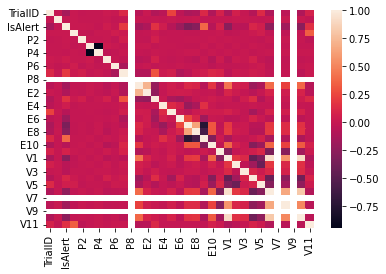

In [13]:
sns.heatmap(train_df.corr())

We can see that, not any of these columns are strongly correlated with the target columns "IsAlert". They might be correlated togather as a new feature but individuallly these features hold no visible meaning that we can derive.

In [14]:
train_df.nunique()

TrialID       500
ObsNum       1211
IsAlert         2
P1         113345
P2         141467
P3            409
P4            409
P5           1219
P6            419
P7            419
P8              1
E1          13640
E2          34569
E3              3
E4            252
E5            254
E6            247
E7             26
E8             10
E9              2
E10           123
E11           120
V1          12418
V2             90
V3             34
V4            324
V5              2
V6           2787
V7              1
V8            323
V9              1
V10             5
V11        180939
dtype: int64

It is also safe to assume that the columns with less than 10 unique values are categorical features fpr example V9,V10,V5,E3E9 etc. Further Detailing will be done in the Encoding Section.

Let us try to explore some more

In [15]:
px.histogram(data_frame=train_df,x="IsAlert",)

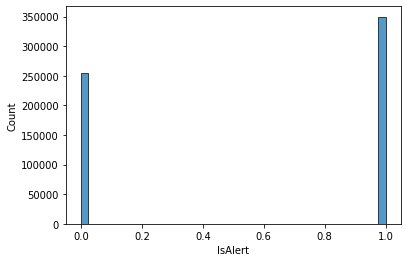

In [16]:
sns.histplot(data=train_df,x="IsAlert",)

As we can see there are around 350k values for IsAlert = 1 and around 250 for IsAlert=0. It indicates that around 58.4% drivers are alert while driving. This is a serious issue that 41.6% of drivers are not paying attention while driving and this may lead to accidents.

Now let us proceed to the next step i.e feature engineering

## Feature Engineering

As mentioned in the Data description column P1, P2 , …….., P8 represent physiological data; The next 11 columns with headers E1, E2, …….., E11 represent environmental data; The next 11 columns with headers V1, V2, …….., V11 represent vehicular data; Let us try to create few more columns based on these and try to increase the correlation if we can.

Firstly let us creat 2 columns names Psum and Pmul, Psum representing the sum of all Physiological columns and Pmul representing their multipliation

And Also Since P8 has only value and that values is 0 let us drop the column P8

In [17]:
train_df["P8"].unique()

array([0])

In [18]:
train_df.drop("P8",inplace=True,axis=1)

In [19]:
test_df.drop("P8",inplace=True,axis=1)

Adding new columns

In [20]:
train_df["Psum"]=train_df.iloc[:,3:10].sum(axis=1)

In [21]:
train_df.head(4)

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,Psum
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004,2164.629231
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729,2167.875401
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736,2172.844601
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667,2166.503761


In [22]:
train_df["Pmul"]=train_df["P1"]*train_df["P2"]*train_df["P3"]*train_df["P4"]*train_df["P5"]*train_df["P6"]*train_df["P7"]

In [23]:
train_df.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,Psum,Pmul
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004,2164.629231,3.578432e+11
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729,2167.875401,4.829433e+11
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736,2172.844601,5.456081e+11
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667,2166.503761,3.178495e+11
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757,2172.346301,5.279610e+11


In [24]:
train_df[["IsAlert","Psum","Pmul"]].corr()

,IsAlert,Psum,Pmul
IsAlert,1.000000,0.001651,0.039852
Psum,0.001651,1.000000,0.006061
Pmul,0.039852,0.006061,1.000000


We can see that these columns also make no sense according to the correlation

It might not be much useful to add more columns which results no increase in correlation. Lets just move further

Like Discussed above we can see some columns have only 1 value let's drop those columns

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  E1       604329 non-null  float64
 11  E2       604329 non-null  float64
 12  E3       604329 non-null  int64  
 13  E4       604329 non-null  int64  
 14  E5       604329 non-null  float64
 15  E6       604329 non-null  int64  
 16  E7       604329 non-null  int64  
 17  E8       604329 non-null  int64  
 18  E9       604329 non-null  int64  
 19  E10      604329 non-null  int64  
 20  E11      604329 non-null  

In [26]:
train_df.nunique()

TrialID       500
ObsNum       1211
IsAlert         2
P1         113345
P2         141467
P3            409
P4            409
P5           1219
P6            419
P7            419
E1          13640
E2          34569
E3              3
E4            252
E5            254
E6            247
E7             26
E8             10
E9              2
E10           123
E11           120
V1          12418
V2             90
V3             34
V4            324
V5              2
V6           2787
V7              1
V8            323
V9              1
V10             5
V11        180939
Psum       603400
Pmul       603561
dtype: int64

We can see columsn `V7`,`V9` hace single values and we can drop them

In [27]:
train_df.drop(["V7","V9"],inplace=True,axis=1)

In [28]:
test_df.drop(["V7","V9"],inplace=True,axis=1)

## Scaling and Encoding

In this section we will perform encoding and scaling of the columns

### Identifying Numerical and Categorical Columns

Like we discussed above lets assume all the columns with less than 10 unique values as categorical solumns. Which Means

In [29]:
categorical_cols=["E3","E8","E9","V5","V10"]

In [30]:
numerical_cols=train_df.columns.tolist()

In [31]:
for i in categorical_cols:
  if i in numerical_cols:
    numerical_cols.remove(i)

In [32]:
for i in ["TrailID","ObsNum","IsAlert","Psum","Pmul"]:
  if i in numerical_cols:
    numerical_cols.remove(i)

In [33]:
numerical_cols

['TrialID',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'E1',
 'E2',
 'E4',
 'E5',
 'E6',
 'E7',
 'E10',
 'E11',
 'V1',
 'V2',
 'V3',
 'V4',
 'V6',
 'V8',
 'V11']

### Scaling

Let use a Min Max Scaler to Scale the Numerical Columns

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler=MinMaxScaler()

In [36]:
scaler.fit(train_df[numerical_cols])

MinMaxScaler()

In [37]:
train_df[numerical_cols]=scaler.transform(train_df[numerical_cols])

In [38]:
train_df.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11,Psum,Pmul
0,0.0,0,0,0.462091,0.474947,0.446215,0.199362,0.009265,0.001942,0.223342,0.0,0.0,1,0.45098,0.494071,0.252964,0.04,1,1,0.448819,0.0,0.786122,0.565737,0.653895,0.012371,0,0.409853,0.163216,4,0.050310,2164.629231,3.578432e+11
1,0.0,1,0,0.459515,0.505470,0.446215,0.199362,0.009265,0.001942,0.223342,0.0,0.0,1,0.45098,0.494071,0.252964,0.04,1,1,0.448819,0.0,0.786276,0.597610,0.653895,0.012371,0,0.410262,0.163216,4,0.050204,2167.875401,4.829433e+11
2,0.0,2,0,0.458894,0.520658,0.446215,0.199362,0.009265,0.001959,0.221788,0.0,0.0,1,0.45098,0.494071,0.252964,0.04,1,1,0.448819,0.0,0.786199,0.577689,0.653895,0.012371,0,0.411079,0.163216,4,0.050207,2172.844601,5.456081e+11
3,0.0,3,0,0.458873,0.466394,0.446215,0.199362,0.009265,0.001959,0.221788,0.0,0.0,1,0.45098,0.494071,0.252964,0.04,1,1,0.448819,0.0,0.786353,0.553785,0.653895,0.012371,0,0.411897,0.163216,4,0.050181,2166.503761,3.178495e+11
4,0.0,4,0,0.458793,0.516499,0.446215,0.199362,0.009265,0.001959,0.221788,0.0,0.0,1,0.45098,0.494071,0.252964,0.04,1,1,0.448819,0.0,0.786970,0.565737,0.653895,0.012371,0,0.412306,0.163216,4,0.050215,2172.346301,5.279610e+11


In [39]:
train_df.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11,Psum,Pmul
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,6.043290e+05
mean,0.490525,603.841765,0.578799,0.467812,0.493359,0.260294,0.422189,0.005154,0.003137,0.165694,0.043085,0.285532,0.290565,0.481902,0.518378,0.390019,0.070292,1.383058,0.876787,0.498514,0.025100,0.593411,0.541524,0.426292,0.041200,0.179814,0.350713,0.154816,3.312257,0.038303,2061.629706,2.766277e+11
std,0.285189,348.931601,0.493752,0.060442,0.032193,0.154023,0.207602,0.013706,0.010955,0.039655,0.057580,0.353501,1.006162,0.069625,0.144559,0.108300,0.114194,1.608807,0.328681,0.148748,0.100137,0.342228,0.045976,0.381115,0.130590,0.384033,0.126365,0.140464,1.243586,0.038084,2523.759922,6.194312e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1198.318472,-3.693561e+12
25%,0.245098,302.000000,0.000000,0.438006,0.475440,0.143426,0.265808,0.001958,0.002361,0.141742,0.000000,0.000000,0.000000,0.474510,0.482213,0.347826,0.000000,0.000000,1.000000,0.409449,0.000000,0.323285,0.525896,0.019157,0.003070,0.000000,0.257359,0.000000,3.000000,0.024040,1772.940867,1.194698e+11
50%,0.490196,604.000000,1.000000,0.457283,0.488255,0.247012,0.379505,0.002436,0.002939,0.159530,0.000000,0.000000,0.000000,0.490196,0.501976,0.415020,0.040000,1.000000,1.000000,0.527559,0.000000,0.774094,0.545817,0.346105,0.006231,0.000000,0.407604,0.155907,4.000000,0.034869,1992.112429,1.603797e+11
75%,0.733333,906.000000,1.000000,0.482856,0.507465,0.356574,0.545091,0.003678,0.003376,0.191164,0.115742,0.587741,0.000000,0.501961,0.545455,0.422925,0.080000,2.000000,1.000000,0.574803,0.000000,0.836546,0.553785,0.673052,0.015442,0.000000,0.438675,0.266748,4.000000,0.052113,2245.102121,2.711152e+11
max,1.000000,1210.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,230747.589495,5.487889e+13


In [40]:
test_df[numerical_cols]=scaler.transform(test_df[numerical_cols])

In [41]:
test_df.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,0.0,0,?,0.491880,0.484343,0.247012,0.379505,0.009695,0.001662,0.251549,0.0,0.0,4,0.498039,0.466403,0.268775,0.04,1,1,0.503937,0.0,0.837086,0.545817,0.019157,0.009301,0,0.434791,0.214373,4,0.055651
1,0.0,1,?,0.491327,0.521823,0.247012,0.379505,0.009695,0.001662,0.251549,0.0,0.0,4,0.498039,0.466403,0.268775,0.04,1,1,0.503937,0.0,0.837086,0.545817,0.019157,0.009301,0,0.434791,0.214373,4,0.055577
2,0.0,2,?,0.490304,0.489228,0.247012,0.379505,0.009695,0.001662,0.251549,0.0,0.0,4,0.505882,0.498024,0.268775,0.04,1,1,0.511811,0.0,0.837702,0.553785,0.019157,0.009301,0,0.435609,0.214373,4,0.055523
3,0.0,3,?,0.487850,0.495627,0.247012,0.379505,0.009695,0.001662,0.251549,0.0,0.0,4,0.505882,0.498024,0.268775,0.04,1,1,0.511811,0.0,0.837702,0.553785,0.019157,0.009301,0,0.435609,0.214373,4,0.055570
4,0.0,4,?,0.486866,0.496527,0.247012,0.379505,0.009695,0.001644,0.253551,0.0,0.0,4,0.505882,0.498024,0.268775,0.04,1,1,0.511811,0.0,0.837086,0.545817,0.019157,0.009301,0,0.436631,0.214373,4,0.055468


In [42]:
test_df.describe()

,TrialID,ObsNum,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
count,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000,120840.000000
mean,0.097052,603.711635,0.467822,0.493461,0.260293,0.423102,0.003071,0.002535,0.183381,0.043642,0.272789,0.191154,0.489074,0.498807,0.346587,0.054331,1.614176,0.868032,0.540592,0.033792,0.606755,0.541716,0.411363,0.066494,0.179394,0.354074,0.156374,3.378633,0.046857
std,0.056599,348.856410,0.026680,0.037252,0.154818,0.210115,0.004190,0.000395,0.023532,0.057178,0.349018,0.776454,0.052282,0.162131,0.189610,0.095056,1.537636,0.338457,0.137456,0.115093,0.327943,0.044650,0.383600,0.202055,0.383684,0.121596,0.150012,1.213857,0.005768
min,0.000000,0.000000,0.325097,0.168809,0.000000,0.022185,0.000048,0.001487,0.104762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135458,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.030137
25%,0.047059,302.000000,0.451720,0.472847,0.141434,0.265808,0.001863,0.002221,0.163635,0.000000,0.000000,0.000000,0.478431,0.426877,0.169960,0.000000,0.000000,1.000000,0.511811,0.000000,0.435929,0.525896,0.019157,0.003070,0.000000,0.304374,0.000000,4.000000,0.042546
50%,0.096078,604.000000,0.463199,0.487300,0.247012,0.379505,0.002292,0.002501,0.182400,0.000000,0.000000,0.000000,0.490196,0.494071,0.379447,0.040000,2.000000,1.000000,0.559055,0.000000,0.784888,0.545817,0.328225,0.006231,0.000000,0.411897,0.149817,4.000000,0.045213
75%,0.145098,906.000000,0.479224,0.506598,0.356574,0.549131,0.002818,0.002851,0.200811,0.116976,0.587030,0.000000,0.501961,0.588933,0.422925,0.080000,3.000000,1.000000,0.606299,0.000000,0.829992,0.553785,0.673052,0.012371,0.000000,0.433974,0.277710,4.000000,0.051933
max,0.194118,1210.000000,0.842275,0.731031,0.898406,1.000000,0.170408,0.004758,0.273097,0.265145,1.000011,4.000000,0.988235,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,0.702290,0.945644,0.900398,1.000000,0.987628,1.000000,0.696648,1.000000,7.000000,0.063812


### Encoding

Let us use a standard One Hot encoder to encode the categorical columns that we selected before

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
encoder=OneHotEncoder(handle_unknown="ignore",sparse=False)

In [45]:
encoder.fit(train_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [46]:
encoded_cols=list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [47]:
encoded_cols

['E3_0',
 'E3_1',
 'E3_4',
 'E8_0',
 'E8_1',
 'E8_2',
 'E8_3',
 'E8_4',
 'E8_5',
 'E8_6',
 'E8_7',
 'E8_8',
 'E8_9',
 'E9_0',
 'E9_1',
 'V5_0',
 'V5_1',
 'V10_1',
 'V10_2',
 'V10_3',
 'V10_4',
 'V10_7']

In [48]:
train_df[encoded_cols]=encoder.transform(train_df[categorical_cols])

In [49]:
train_df[encoded_cols].head()

,E3_0,E3_1,E3_4,E8_0,E8_1,E8_2,E8_3,E8_4,E8_5,E8_6,E8_7,E8_8,E8_9,E9_0,E9_1,V5_0,V5_1,V10_1,V10_2,V10_3,V10_4,V10_7
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
test_df[encoded_cols]=encoder.transform(test_df[categorical_cols])

In [51]:
test_df[encoded_cols].head()

,E3_0,E3_1,E3_4,E8_0,E8_1,E8_2,E8_3,E8_4,E8_5,E8_6,E8_7,E8_8,E8_9,E9_0,E9_1,V5_0,V5_1,V10_1,V10_2,V10_3,V10_4,V10_7
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Training and Validation Split

Since the data is not time series, we can split the training dataset using `train_test_split` from skelearn's model_selection module

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train, valid=train_test_split(train_df,test_size=0.3,random_state=42)

In [54]:
train.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11,Psum,Pmul,E3_0,E3_1,E3_4,E8_0,E8_1,E8_2,E8_3,E8_4,E8_5,E8_6,E8_7,E8_8,E8_9,E9_0,E9_1,V5_0,V5_1,V10_1,V10_2,V10_3,V10_4,V10_7
212121,0.343137,620,1,0.474577,0.565917,0.211155,0.428423,0.002388,0.004075,0.120263,0.131878,0.949505,0,0.482353,0.501976,0.411067,0.04,1,1,0.566929,0.0,0.826908,0.545817,0.326948,0.009301,0,0.428046,0.000000,4,0.029485,2166.120986,2.775484e+11,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
233247,0.376471,1201,1,0.532614,0.485910,0.312749,0.305983,0.009457,0.004075,0.120263,0.133230,0.648851,0,0.474510,0.501976,0.363636,0.08,1,1,0.496063,0.0,0.886045,0.482072,0.673052,0.003070,1,0.463818,0.246041,4,0.051563,2356.503190,5.150746e+11,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6943,0.009804,888,1,0.448944,0.547202,0.129482,0.574266,0.001863,0.002536,0.180333,0.000000,0.000000,0,0.490196,0.494071,0.422925,0.00,0,1,0.330709,0.0,0.000000,0.501992,0.000000,0.207423,0,0.128577,0.000000,1,0.049431,1686.767415,1.951190e+11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
394479,0.639216,406,1,0.474407,0.525854,0.290837,0.328509,0.003200,0.003096,0.152636,0.000000,0.000000,0,0.498039,0.150198,0.422925,0.08,0,1,0.417323,0.0,0.000000,0.553785,0.000000,0.024743,0,0.162510,0.000000,1,0.016629,2103.101040,2.594521e+11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
101608,0.164706,80,1,0.555580,0.498261,0.262948,0.359954,0.002818,0.003551,0.135687,0.126841,0.969788,0,0.490196,0.466403,0.371542,0.04,1,1,0.440945,0.0,0.784348,0.577689,0.326948,0.009301,0,0.406787,0.059683,4,0.020589,2152.971362,2.419863e+11,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423030 entries, 212121 to 121958
Data columns (total 54 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  423030 non-null  float64
 1   ObsNum   423030 non-null  int64  
 2   IsAlert  423030 non-null  int64  
 3   P1       423030 non-null  float64
 4   P2       423030 non-null  float64
 5   P3       423030 non-null  float64
 6   P4       423030 non-null  float64
 7   P5       423030 non-null  float64
 8   P6       423030 non-null  float64
 9   P7       423030 non-null  float64
 10  E1       423030 non-null  float64
 11  E2       423030 non-null  float64
 12  E3       423030 non-null  int64  
 13  E4       423030 non-null  float64
 14  E5       423030 non-null  float64
 15  E6       423030 non-null  float64
 16  E7       423030 non-null  float64
 17  E8       423030 non-null  int64  
 18  E9       423030 non-null  int64  
 19  E10      423030 non-null  float64
 20  E11      423030 non-n

In [56]:
valid.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11,Psum,Pmul,E3_0,E3_1,E3_4,E8_0,E8_1,E8_2,E8_3,E8_4,E8_5,E8_6,E8_7,E8_8,E8_9,E9_0,E9_1,V5_0,V5_1,V10_1,V10_2,V10_3,V10_4,V10_7
551187,0.892157,1207,0,0.438778,0.456423,0.300797,0.318048,0.002054,0.003218,0.147671,0.132419,0.479396,0,0.505882,0.517787,0.521739,0.12,2,1,0.519685,0.0,0.834541,0.537849,0.019157,0.003070,0,0.439902,0.271620,4,0.035890,2135.226615,8.343058e+10,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
155822,0.250980,1126,1,0.609066,0.495684,0.197211,0.449561,0.001719,0.003743,0.129594,0.000357,0.054698,0,0.490196,0.644269,0.418972,0.00,2,1,0.401575,0.0,0.000000,0.513944,0.000000,0.021672,0,0.135119,0.000000,1,0.030687,2076.936823,2.001985e+11,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
186872,0.301961,744,1,0.435046,0.437501,0.213147,0.425507,0.001003,0.003498,0.137449,0.117021,0.616256,0,0.443137,0.482213,0.383399,0.04,1,1,0.543307,0.0,0.767772,0.513944,0.673052,0.006231,0,0.406787,0.052375,4,0.032760,2025.962694,4.091599e+10,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
66220,0.105882,958,1,0.448261,0.580381,0.284861,0.334972,0.001385,0.002624,0.175363,0.131656,0.471562,0,0.498039,0.509881,0.304348,0.04,1,1,0.496063,0.0,0.857363,0.553785,0.326948,0.006231,0,0.442764,0.097442,4,0.029233,1997.445142,2.016847e+11,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
541241,0.876471,923,0,0.443919,0.484716,0.392430,0.237008,0.002101,0.002991,0.157164,0.000000,0.000000,0,0.490196,0.462451,0.596838,0.00,0,1,0.535433,0.0,0.832691,0.525896,1.000000,0.000000,0,0.431930,0.235079,4,0.035173,2267.904502,1.233716e+11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181299 entries, 551187 to 407534
Data columns (total 54 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  181299 non-null  float64
 1   ObsNum   181299 non-null  int64  
 2   IsAlert  181299 non-null  int64  
 3   P1       181299 non-null  float64
 4   P2       181299 non-null  float64
 5   P3       181299 non-null  float64
 6   P4       181299 non-null  float64
 7   P5       181299 non-null  float64
 8   P6       181299 non-null  float64
 9   P7       181299 non-null  float64
 10  E1       181299 non-null  float64
 11  E2       181299 non-null  float64
 12  E3       181299 non-null  int64  
 13  E4       181299 non-null  float64
 14  E5       181299 non-null  float64
 15  E6       181299 non-null  float64
 16  E7       181299 non-null  float64
 17  E8       181299 non-null  int64  
 18  E9       181299 non-null  int64  
 19  E10      181299 non-null  float64
 20  E11      181299 non-n

Now we have a training and validation with a 70 30 split

Now let us save these data frames to the drive

## Identifying inputs and targets

We know that the target is the `IsAlert` column which we need to predict and inputs can be easily found by adding numerical_cols+enocoded_cols

In [58]:
target=["IsAlert"]

In [59]:
inputs=numerical_cols+encoded_cols

In [130]:
inputs.remove("TrialID")

In [131]:
inputs

['P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'E1',
 'E2',
 'E4',
 'E5',
 'E6',
 'E7',
 'E10',
 'E11',
 'V1',
 'V2',
 'V3',
 'V4',
 'V6',
 'V8',
 'V11',
 'E3_0',
 'E3_1',
 'E3_4',
 'E8_0',
 'E8_1',
 'E8_2',
 'E8_3',
 'E8_4',
 'E8_5',
 'E8_6',
 'E8_7',
 'E8_8',
 'E8_9',
 'E9_0',
 'E9_1',
 'V5_0',
 'V5_1',
 'V10_1',
 'V10_2',
 'V10_3',
 'V10_4',
 'V10_7']

Now we have also identified the input and target columns. Let us proceed to the next step i.e Model Building and Predections

## Models

Since this is a classification problem let use **Logistic Regression**, **Support Vector Machine's SVC classifier**, **Descion Trees** and **Random Forest** as the models 

Without further ado lets move on to the first model

## Logistic Regression

The logistics regression is common and is a useful regression method for solving the binary classification problem. Another category of classification is Multinomial classification, which handles the issues where multiple classes are present in the target variable.

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
lr=LogisticRegression() # using default parameters

In [138]:
lr.fit(train[inputs],train[target])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Now let us check the training and validation accuracy

In [139]:
train_preds=lr.predict(train[inputs])

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
print(f"Training accuracy :{accuracy_score(train[target],train_preds)}")

Training accuracy :0.8316951516440915


We can see the LogisticRegression model has an training accuracy of 83.16% which is not a great score but a decent one

In [142]:
valid_preds=lr.predict(valid[inputs])
print(f"Validation accuracy :{accuracy_score(valid[target],valid_preds)}")

Validation accuracy :0.8313338738768553


Validation accuracy is also around 83.1%. So it is safe to assume that the model is niether overfitting nor underfitting. Let us try to improve accuracy by some hyperparameter tuning

### Hyperparameter Tuning

Let us tune the following parameters

solver:{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}

max_iter

n_jobs

dual

Let us use RandomSearchCV from sklearn to find the best fit of parameters

In [143]:
params={"max_iter":[10,100,200,500,1000],"n_jobs":[None,1,10,100,250],"dual":[True,False],"solver":("newton-cg","lbfgs","liblinear","sag","saga")}

In [144]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
clf=RandomizedSearchCV(lr,params)

In [146]:
searc=clf.fit(train[inputs],train[target])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConv

In [147]:
searc.best_params_

{'dual': False, 'max_iter': 1000, 'n_jobs': 1, 'solver': 'lbfgs'}

We got the best parameters to build the model. we can see max_iter got the max value ofgiven values.So it may still be greater than 1000, but lets see wt is the accuracy score with these parameters

In [148]:
train_preds_lr=clf.predict(train[inputs])

In [149]:
print(f"Training accuracy :{accuracy_score(train[target],train_preds_lr)}")

Training accuracy :0.8318038909769992


We can see the accuracy isnt imporved so much just a .02%. Let us see the validation accuracy

In [150]:
val_preds_lr=clf.predict(valid[inputs])
print(f"Validation accuracy :{accuracy_score(valid[target],val_preds_lr)}")

Validation accuracy :0.8315545038858461


The validation accuracy is also improved o;y by 0.02%

Let us try the next model i.e Descion Tree Classifier

## Descion Trees

Decision tree classifiers are used successfully in many diverse areas. Their most important feature is the capability of capturing descriptive decisionmaking knowledge from the supplied data. Decision tree can be generated from training sets.4.3.1.1 Structured edge detection
Since a decision tree classifier generates the actual prediction at the leaf nodes, more information (instead of only class likelihoods) can be stored at the leaf nodes.

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
dt=DecisionTreeClassifier()

In [153]:
dt.fit(train[inputs],train[target])

DecisionTreeClassifier()

Let us check the tarining and validation scores

In [154]:
train_dt_preds=dt.predict(train[inputs])
print(f"Training accuracy :{accuracy_score(train[target],train_dt_preds)}")

Training accuracy :1.0


In [155]:
valid_dt_preds=dt.predict(valid[inputs])
print(f"Training accuracy :{accuracy_score(valid[target],valid_dt_preds)}")

Training accuracy :0.985499092659088


We can see that the RandomForest Classifiers Did a great job in predecting the target column
We have an training accuracy of 100% and validation accuracy of 98.5 %

### Hyperparameter tuning

Let us try hyperparameter tuning to see if we increase the validation accuracy

In [156]:
param_df={"max_depth":[8,16,32.64,100],"min_samples_leaf":[0,1,2,4,8]}

In [157]:
clf_dt=GridSearchCV(dt,param_df)


In [158]:
sear=clf_dt.fit(train[inputs],train[target])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 237, in fit
    % self.min_samples_leaf
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0


/us

In [159]:
sear.best_params_

{'max_depth': 100, 'min_samples_leaf': 1}

In [160]:
train_dt_pred1=clf_dt.predict(train[inputs])
print(f"Training accuracy :{accuracy_score(train[target],train_dt_pred1)}")

Training accuracy :1.0


In [161]:
valid_dt_pred1=clf_dt.predict(valid[inputs])
print(f"Training accuracy :{accuracy_score(valid[target],valid_dt_pred1)}")

Training accuracy :0.9852288208980744


Even after hyperparameter tuning the accuracy isnt improved much it also got down by .02%. Since the accuracy is already high it is difficult to improve much more. Let us see the accuracy with the testing set

### Looking into the tree

In [162]:
from sklearn.tree import plot_tree, export_text

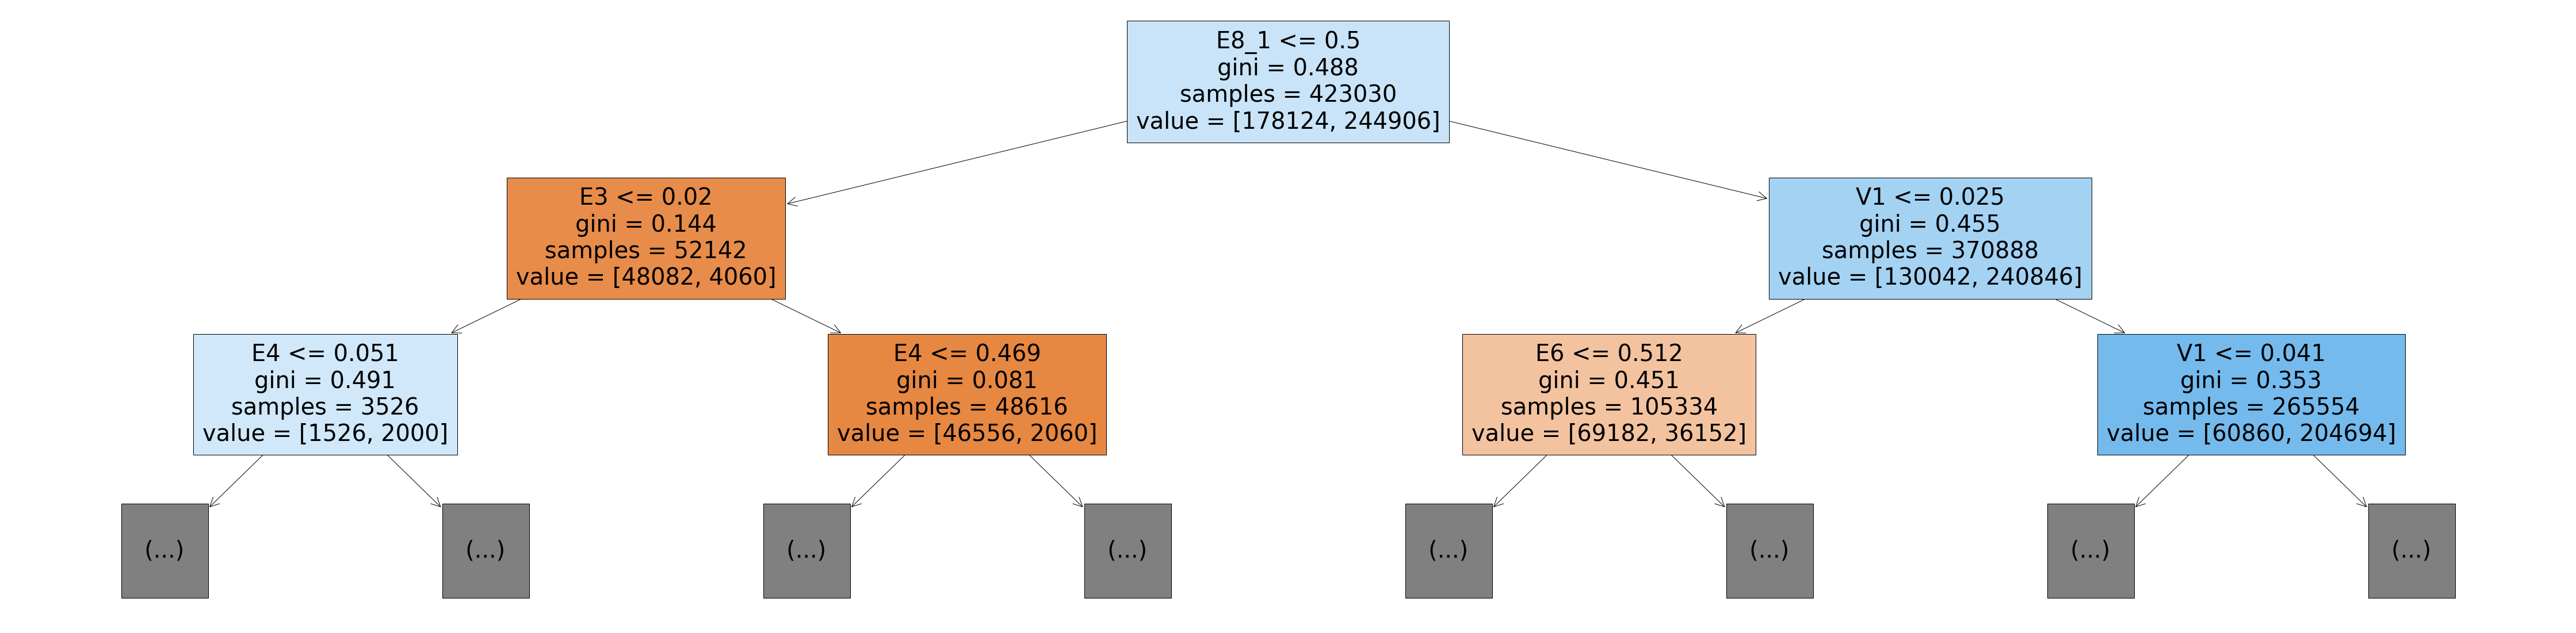

In [163]:
plt.figure(figsize=(80,20))
plot_tree(dt,feature_names=train.columns,max_depth=2,filled=True);

Here we cam see the major deciding factor is the encoded `E8_1` column. Based on its value further dividing is being done

In [164]:
tree_text = export_text(dt, max_depth=5, feature_names=inputs)
print(tree_text[:5000])

|--- E9_1 <= 0.50
|   |--- E7 <= 0.02
|   |   |--- E10 <= 0.05
|   |   |   |--- V2 <= 0.51
|   |   |   |   |--- E5 <= 0.52
|   |   |   |   |   |--- P1 <= 0.43
|   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |--- P1 >  0.43
|   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |--- E5 >  0.52
|   |   |   |   |   |--- V6 <= 0.13
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- V6 >  0.13
|   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- V2 >  0.51
|   |   |   |   |--- E1 <= 0.13
|   |   |   |   |   |--- E10 <= 0.01
|   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |--- E10 >  0.01
|   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |--- E1 >  0.13
|   |   |   |   |   |--- P5 <= 0.00
|   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |--- P5 >  0.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- E10 >  0.05
|   |   |   |--- E10

Let us finalize this descion tree model as our final  model and let us move forward to predict the testing dataset

## Final Predections

Before doing the final prediction let us train the descion tree with the validation data

In [165]:
clf_dt.fit(valid[inputs],valid[target])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 237, in fit
    % self.min_samples_leaf
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0


/us

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 16, 32.64, 100],
                         'min_samples_leaf': [0, 1, 2, 4, 8]})

In [166]:
test_predections=clf_dt.predict(test_df[inputs])

In [181]:
test_predections[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [168]:
sample_submission=pd.read_csv("./stayalert/example_submission.csv")

In [169]:
sample_submission.head()

,TrialID,ObsNum,Prediction
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0


In [170]:
sample_submission["Prediction"]=test_predections

In [171]:
sample_submission.head(10)

,TrialID,ObsNum,Prediction
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1
5,0,5,1
6,0,6,1
7,0,7,1
8,0,8,1
9,0,9,1


In [186]:
solution=pd.read_csv("./stayalert/Solution.csv")

In [187]:
accuracy_score(solution["Prediction"],sample_submission["Prediction"])

1.0

As we can see, our model has a **Testing accuracy of 100%**, which is great

## Saving the Weights

Let us see the weights of each feature


In [191]:
importance_df = pd.DataFrame({
    'feature': inputs,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

In [192]:
importance_df.head(10)

,feature,importance
21,V11,0.254407
36,E9_1,0.144797
15,V1,0.095713
6,P7,0.060724
26,E8_1,0.053234
13,E10,0.046008
4,P5,0.044673
11,E6,0.038687
0,P1,0.032561
10,E5,0.027568


We can see these are the top 10 weighted features. Lets juts save them

In [193]:
importance_df.to_csv("./stayalert/weights.csv",index=False)

## Making Predections on New Inputs

In [208]:
def predict_input(model,inp):
  input_df=pd.DataFrame([inp])
  input_df[numerical_cols]=scaler.transform(input_df[numerical_cols])
  input_df[encoded_cols]=encoder.transform(input_df[categorical_cols])
  pred=model.predict(input_df[inputs])[0]
  prob=model.predict_proba(input_df[inputs])[0][list(model.classes_).index(pred)]
  return pred,prob


In [209]:
new_input={
    "TrialID":0.0,"ObsNum":4,"P1":0.4868660978,"P2":0.4965270554,
    "P3":0.2470119522,"P4":0.379504785,"P5":0.0096953313,"P6":0.0016441902,
    "P7":0.253551495,"E1":0.0,"E2":0.0,"E3":4,"E4":0.5058823529,
    "E5":0.4980237154,"E6":0.2687747036,"E7":0.04,"E8":1,"E9":1,
    "E10":0.5118110236,"E11":0.0,"V1":0.8370855821,"V2":0.5458167331,
    "V3":0.0191570881,"V4":0.009301056,"V5":0,"V6":0.4366312347,
    "V8":0.2143727162,"V10":4,"V11":0.055467766
}

In [210]:
predict_input(dt,new_input)

(1, 1.0)

## Saving The model

In [211]:
import joblib

In [213]:
Driver_Alertness={
    'model':dt,
    'scaler':scaler,
    'encoder':encoder,
    'numerical_cols':numerical_cols,
    'categorical_cols':categorical_cols,
    'encoded_cols':encoded_cols,
    'inputs':inputs,
    'target':target
}

In [214]:
joblib.dump(Driver_Alertness,"Driver_Alertness.joblib")

['Driver_Alertness.joblib']

## Summary and References

### Summary

In this project we succeded in finding the Alertness of vehicle driver during various conditions with given data such as vehicle related features, driver features and etc.
We are able to achieve a 100% accurate results

In this project we covered the following topics


*   Introduction to the problem statement
*   Downloading the Libraries and importing them
*   Downloading and importing the data required 
*   Data Exploration (Exploratory Data Analysis)
*   Feature Engineering
*   Scaling and Encoding the data
*   Training and validation Split
*   Identifying Inputs and target columns
*   Selecting the models to use
*   Logistic Regression
*   Descion Trees
*   Final Predections
*   Saving the weights of the model
*   Making predections on new inputs
*   Saving the Model




### References

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

[RandomizedSearchCV](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
)

[DecisionTreeClassifier](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Stay Alert! The Ford Challenge](https://https://www.kaggle.com/c/stayalert/overview)


[Real-World Machine Learning Model](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model)